In [4]:
import yt
import numpy as np
import trident as tri

In [5]:
filename = "~/Repo/yt/doc/source/quickstart/IsolatedGalaxy/galaxy0030/galaxy0030"

In [41]:
ds = yt.load(filename)

ray_start= np.array([0.4, 0, 0.45], dtype=float)
ray_end = np.array([0.4, 1, 0.45], dtype=float)

ray = ray_end - ray_start
line_list = ['O VI', 'H I', 'C IV']
norm_vec = [ray[1], -1*ray[0], 0]

yt : [INFO     ] 2019-03-28 00:27:00,137 Parameters: current_time              = 0.00600002000283
yt : [INFO     ] 2019-03-28 00:27:00,139 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-03-28 00:27:00,140 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-28 00:27:00,142 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-28 00:27:00,143 Parameters: cosmological_simulation   = 0.0


## coding up ray

In [42]:
ray_start =ds.arr(ray_start, "code_length")
ray_end = ds.arr(ray_end, "code_length")
tri_ray = tri.make_simple_ray(ds,
                              start_position = ray_start,
                              end_position = ray_end,
                              lines = line_list,
			      ftype = 'gas')


Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 5737.76it/s]
yt : [INFO     ] 2019-03-28 00:27:00,948 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-03-28 00:27:02,416 Getting segment at z = 0.0: [0.4  0.   0.45] unitary to [0.4  1.   0.45] unitary.
yt : [INFO     ] 2019-03-28 00:27:02,420 Getting subsegment: [0.4 unitary, 0.0 unitary, 0.45 unitary] to [0.4 unitary, 1.0 unitary, 0.45 unitary].
yt : [INFO     ] 2019-03-28 00:27:02,507 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2019-03-28 00:27:02,760 Parameters: current_time              = 0.0060000200028298 code_time
yt : [INFO     ] 2019-03-28 00:27:02,762 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-03-28 00:27:02,763 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-03-28 00:27:02,765 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2019-03-28 00:27:02,767 Parameters: cosmological_simulation   

In [43]:
spx = yt.SlicePlot(ds, 'x', 
                   'density', 
                   center = [0.5, 0.5, 0.5],
                   width= (1))
spx.annotate_ray(tri_ray)
spx.save("xSlice.png")

yt : [INFO     ] 2019-03-28 00:27:02,813 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-28 00:27:02,815 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-03-28 00:27:02,817 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-28 00:27:02,819 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-03-28 00:27:02,821 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2019-03-28 00:27:03,301 Saving plot xSlice.png


['xSlice.png']

In [44]:
#want norm vector that would give same result as x-axis slice
center = (ray_end + ray_start)/2
center[2]=0.5
sp_me= yt.SlicePlot(ds, norm_vec, 'density', 
                    center = center, 
                    north_vector=[0,0,1],
                    width= (1))
sp_me.annotate_ray(tri_ray)
sp_me.save("slice.png")

yt : [WARNING  ] 2019-03-28 00:27:03,764 Ignoring 'north_vector' keyword as it is ill-defined for an AxisAlignedSlicePlot object.
yt : [INFO     ] 2019-03-28 00:27:03,781 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-28 00:27:03,782 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-03-28 00:27:03,785 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-03-28 00:27:03,786 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-03-28 00:27:03,789 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2019-03-28 00:27:04,080 Saving plot slice.png


['slice.png']

In [45]:
norm_vec

[1.0, -0.0, 0]

In [46]:
center

YTArray([0.4, 0.5, 0.5]) unitary

In [47]:
sg = tri.SpectrumGenerator('COS-G130M')
spect = sg.make_spectrum(tri_ray, lines=line_list)
s =sg.plot_spectrum('spec_raw.png')

yt : [INFO     ] 2019-03-28 00:27:04,459 Setting instrument to COS-G130M
yt : [INFO     ] 2019-03-28 00:27:04,513 Allocating for 1.180e+02 particles (index particle type 'all')
yt : [INFO     ] 2019-03-28 00:27:04,522 Identified 7.300e+01 octs
yt : [INFO     ] 2019-03-28 00:27:04,845 Creating O_p5_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2019-03-28 00:27:04,955 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2019-03-28 00:27:04,993 Creating spectrum
yt : [INFO     ] 2019-03-28 00:27:05,040 12 out of 118 line components will be deposited as unresolved lines.
Adding line - O VI 1038 [1037.613000 A]: : 100%|██████████| 118/118 [00:00<00:00, 1813.85it/s]
yt : [INFO     ] 2019-03-28 00:27:05,111 13 out of 118 line components will be deposited as unresolved lines.
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 118/118 [00:00<00:00, 1664.15it/s]
yt : [INFO     ] 2019-03-28 00:27:07,611 Not adding con

In [56]:
def ion_p_name(ion):
    return ion.split()[0]+'_p'+str(tri.from_roman(ion.split()[1])-1)

i = 'C IV'
ion_p_name(i)

'C_p3'

In [49]:
import h5py

In [57]:
ray = h5py.File("ray.h5")
i.split?

In [51]:
ray["grid"]['dl']

<HDF5 dataset "dl": shape (118,), type "<f8">

In [52]:
ray['grid']['']

ValueError: No name (no name)

In [53]:
ion='H I'
ray['grid']['Cp4_number_density']

KeyError: "Unable to open object (object 'Cp4_number_density' doesn't exist)"

In [54]:
ray.close()

In [62]:
import matplotlib.pyplot as plt

In [58]:
x = np.arange(0, 5)

In [60]:
y = np.array([2, 4, 6, 8, 10])

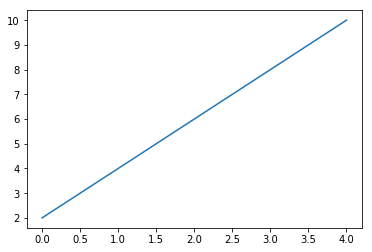

In [68]:
fig = plt.figure()
plot = plt.plot(x,y)

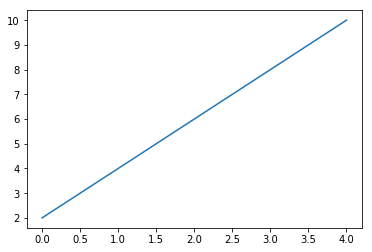

In [69]:
fig